In [242]:
import numpy as np
import pandas as pd 
import seaborn as sns

Loading Cars.csv 

In [243]:
df = pd.read_csv("./datasets/Cars.csv")

In [244]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Mapping owners from first to fourth as 1 to 4 as well as 5 for test drive car

In [245]:
df['owner'] = df['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5,})
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [246]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

Drop rows from fuel column that have values of LPG or CNG because these are different measurements for mileage.

In [247]:
df = df[df.fuel != "LPG"]
df = df[df.fuel != "CNG"]

In [248]:
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Extract only the numerical value from mileage, engine, and max_power columns.

In [249]:
df["mileage"].replace(' kmpl', '', regex=True, inplace=True)
df["engine"].replace(' CC', '', regex=True, inplace=True)
df["max_power"].replace(' bhp', '', regex=True, inplace=True)

Extract only the first word of each car model (the manufacturer).

In [250]:
df['name'] = df['name'].str.split().str[0]

Drop torque column, too hard to understand. :()

In [251]:
df.drop('torque', axis=1, inplace=True)

Encoding 0 and 1 for binary columns (fuel and transmission)

In [252]:
#do label encoding the Loan Status
from sklearn.preprocessing import LabelEncoder

#do label encoding the Loan Status
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])

print("I want to know the mapping of 0 and 1", le.inverse_transform([0, 1]))

I want to know the mapping of 0 and 1 ['Diesel' 'Petrol']


In [253]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,Individual,Manual,1,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,0,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,1,Individual,Manual,3,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,0,Individual,Manual,1,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,1,Individual,Manual,1,16.1,1298,88.2,5.0


In [254]:
df['transmission'] = le.fit_transform(df['transmission'])

print("I want to know the mapping of 0 and 1", le.inverse_transform([0, 1]))
df

I want to know the mapping of 0 and 1 ['Automatic' 'Manual']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,Individual,1,1,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,0,Individual,1,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,1,Individual,1,3,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,0,Individual,1,1,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,1,Individual,1,1,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,1,Individual,1,1,18.5,1197,82.85,5.0
8124,Hyundai,2007,135000,119000,0,Individual,1,4,16.8,1493,110,5.0
8125,Maruti,2009,382000,120000,0,Individual,1,1,19.3,1248,73.9,5.0
8126,Tata,2013,290000,25000,0,Individual,1,1,23.57,1396,70,5.0


One hot encoding for seller type

In [255]:
print(df['seller_type'].unique())

df = pd.get_dummies(df, columns=['seller_type'])


['Individual' 'Dealer' 'Trustmark Dealer']


One hot encode the name of car.

Change all object dtypes to int/float

In [256]:
df = pd.get_dummies(df,
                    columns = ["name"],
                    drop_first = True)

df=df*1

In [258]:
df.iloc[1]

year                              2014
selling_price                   370000
km_driven                       120000
fuel                                 0
transmission                         1
owner                                2
mileage                          21.14
engine                            1498
max_power                       103.52
seats                              5.0
seller_type_Dealer                   0
seller_type_Individual               1
seller_type_Trustmark Dealer         0
name_Ashok                           0
name_Audi                            0
name_BMW                             0
name_Chevrolet                       0
name_Daewoo                          0
name_Datsun                          0
name_Fiat                            0
name_Force                           0
name_Ford                            0
name_Honda                           0
name_Hyundai                         0
name_Isuzu                           0
name_Jaguar              

Fill in missing values for mileage, engine, max_power, seats.

Check using plots whether mean is sufficient for filling.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


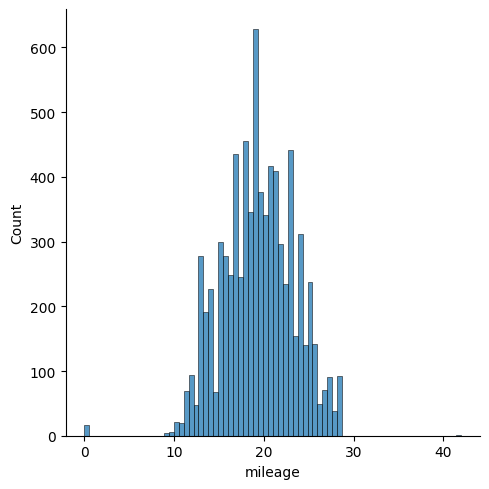

In [119]:
sns.displot(data=df, x='mileage')

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


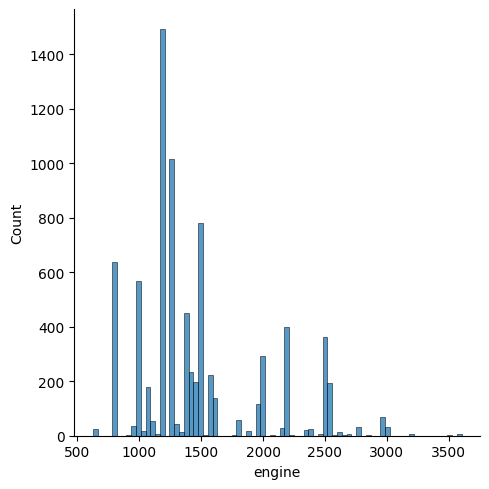

In [120]:
sns.displot(data=df, x='engine')

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


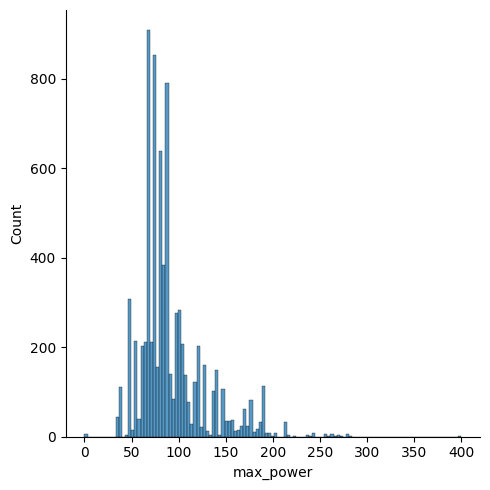

In [121]:
sns.displot(data=df, x='max_power')

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


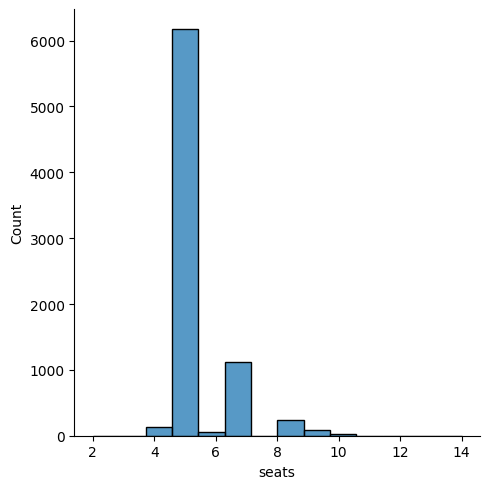

In [122]:
sns.displot(data=df, x='seats')

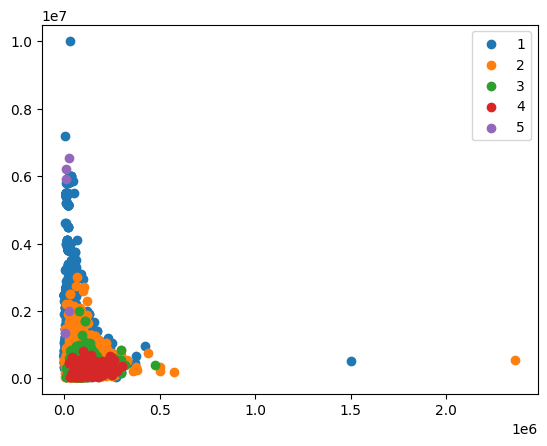

In [123]:
import matplotlib.pyplot as plt

labels = df['owner'].unique()
legend_handles = []

for label in labels:
    subset = df[df['owner'] == label]
    scatter = plt.scatter(subset["km_driven"], subset["selling_price"], label=label)
    
    legend_handles.append(scatter)

plt.legend(handles=legend_handles)

plt.show()

In [124]:
df["mileage"].fillna(df["mileage"].astype("float64").mean(), inplace = True)

df["engine"].fillna(df["engine"].astype("float64").mean(), inplace = True)

df["max_power"].fillna(df["max_power"].astype("float64").mean(), inplace = True)

df["seats"].fillna(df["seats"].astype("float64").mean(), inplace = True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8033 non-null   object 
 1   year                          8033 non-null   int64  
 2   selling_price                 8033 non-null   int64  
 3   km_driven                     8033 non-null   int64  
 4   fuel                          8033 non-null   int64  
 5   transmission                  8033 non-null   int64  
 6   owner                         8033 non-null   int64  
 7   mileage                       8033 non-null   float64
 8   engine                        8033 non-null   float64
 9   max_power                     8033 non-null   float64
 10  seats                         8033 non-null   float64
 11  seller_type_Dealer            8033 non-null   int64  
 12  seller_type_Individual        8033 non-null   int64  
 13  seller_t

In [126]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count of cars')

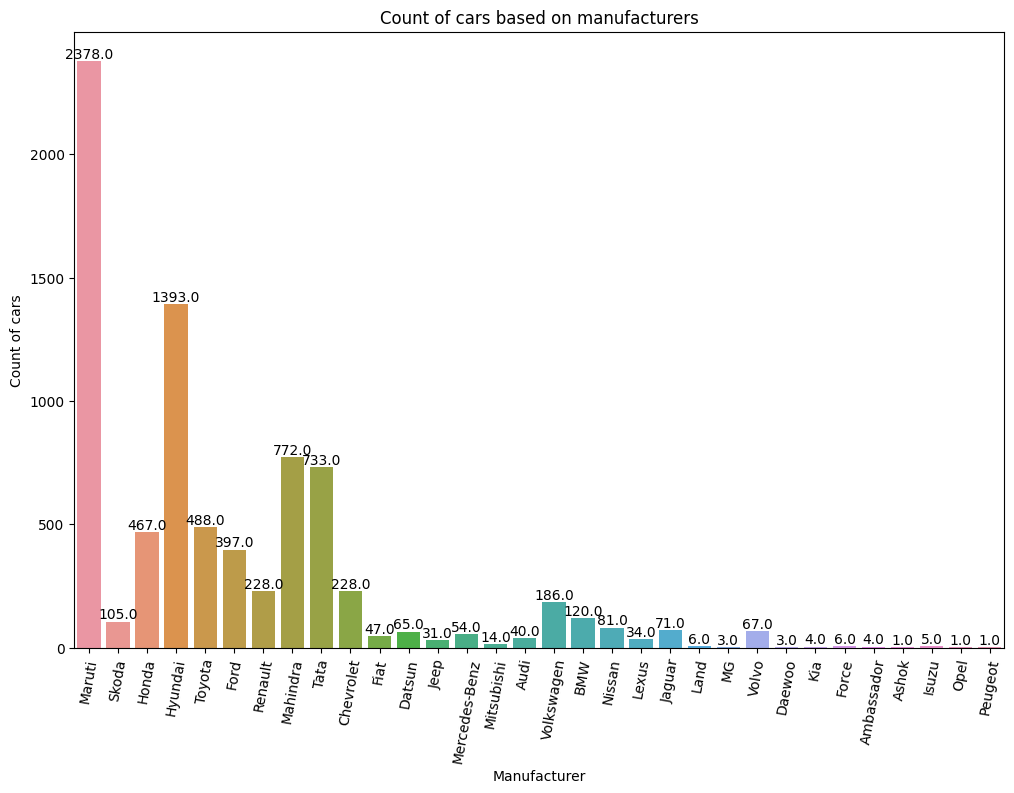

In [127]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'name', data = df)
plt.xticks(rotation = 80)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='selling_price', ylabel='km_driven'>

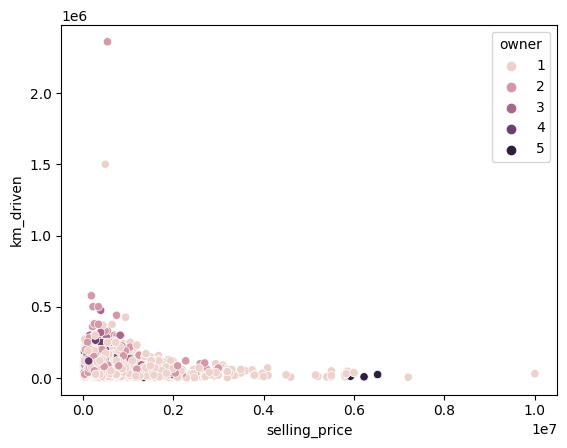

In [128]:
sns.scatterplot(x = df['selling_price'], y = df['km_driven'], hue=df['owner'])

<Axes: >

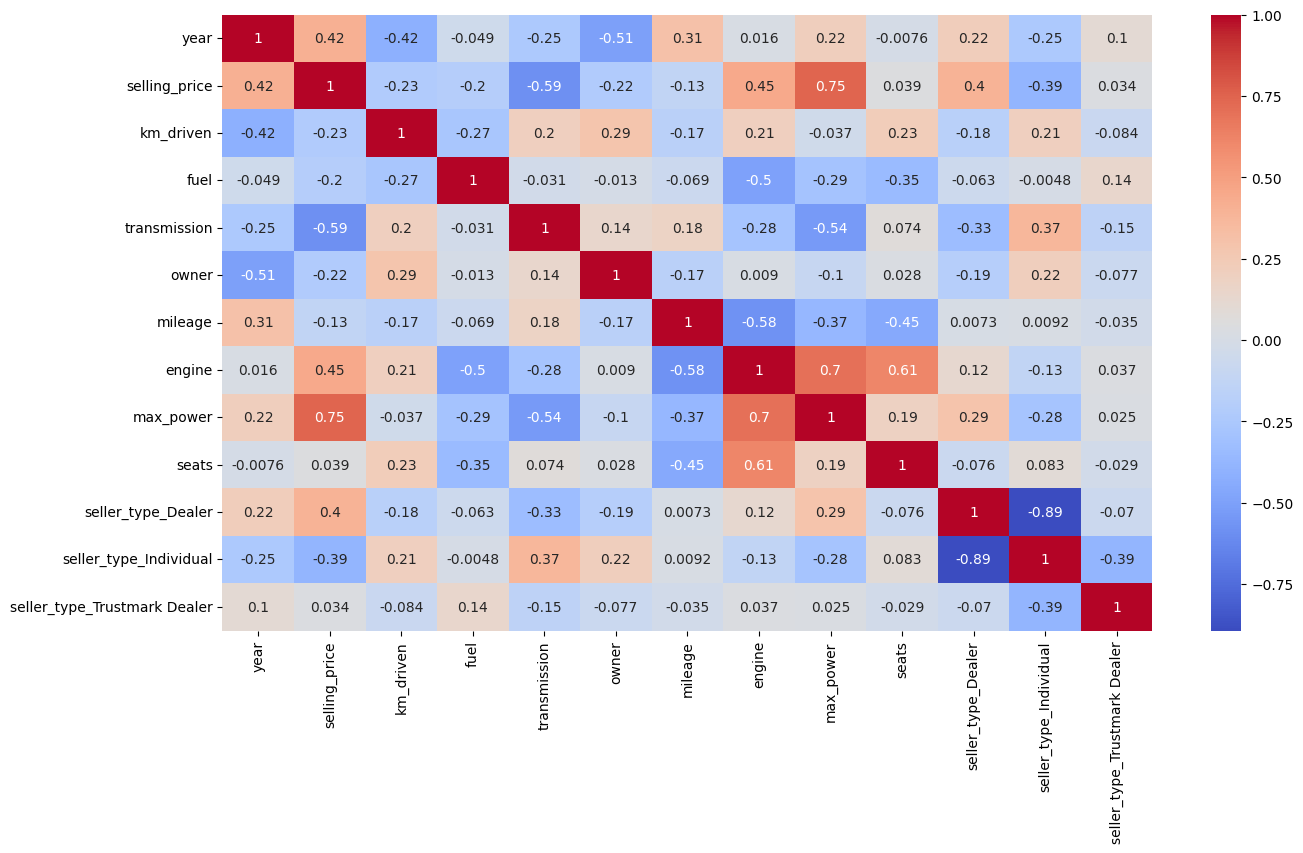

In [129]:
plt.figure(figsize = (15,8))
sns.heatmap(df.loc[:, df.columns != 'name'].corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Split training and test set. y contains selling price only.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :], 
                                                    df.loc[:, 'selling_price'], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [133]:
X_train = X_train.drop('selling_price', axis=1)
X_test = X_test.drop('selling_price', axis=1)

log transform selling_price because it is too large

In [137]:
# y_train = np.log(y_train)

Drop year column because it is not really relavent.

In [138]:
X_train.drop('year', axis=1, inplace=True)
X_test.drop('year', axis=1, inplace=True)

In [139]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

X_test = X_test[X_train.columns]

Scale data using standard scaler

In [140]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

Try with linear regression.

In [141]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)

In [142]:
# y_pred = np.exp(y_pred)
r2_score(y_test, y_pred)

0.825654652987823

Log transforming y 

In [143]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train_log)
y_pred = rf.predict(X_test)
r2_score(y_test_log, y_pred)

0.8860567219301381

Try with random forest.

In [144]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9294725369767304

Random forest with standard scalar and no log transform produces an R2 score of 0.929.

Worse prediction when log transforming target price.

# Saving and loading model.

In [145]:
import pickle

with open('models/random_forest_regressor.pickle', 'wb') as f:
    pickle.dump(rf, f)

In [146]:
with open('models/random_forest_regressor.pickle', 'rb') as f:
        model = pickle.load(f)

In [147]:
y_pred_2 = model.predict(X_test)
r2_score(y_test, y_pred_2)

0.9294725369767304

In [53]:
columns = ['name', 'km_driven' , 'fuel', 'transmission' , 'owner' , 'mileage' , 'engine' , 'max_power', 'seats', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer']

input = pd.DataFrame(columns=columns)

input

,name,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer


In [98]:
columns = ['name', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer']
        
      #  'Audi',
      #  'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat',
      #  'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
      #  'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus',
      #  'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
      #  'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
      #  'Renault', 'Skoda', 'Tata', 'Toyota',
      #  'Volkswagen', 'Volvo']

data = [['Maruti', 145500, 'Diesel',1, 1, 23.4, 1248, 74, 5, 0, 1, 0]]

X_input = pd.DataFrame(columns=columns, data=data)

In [100]:
X_input

,name,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,145500,Diesel,1,1,23.4,1248,74,5,0,1,0
